In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from sklearn.model_selection import train_test_split

from keras.models import load_model

#import util
#from public_tests import *
#from test_utils import *

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from PIL import Image
import os

In [3]:
data = pd.read_csv(r"C:\Users\nico_\Desktop\thorax_xray\Data_Entry_2017_v2020.csv")

In [4]:
df = pd.read_csv(r"C:\Users\nico_\Desktop\thorax_xray\miccai2023_nih-cxr-lt_labels_train.csv")

In [5]:
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [6]:
df.head()

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,subj_id
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [7]:
df.columns

Index(['id', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding',
       'subj_id'],
      dtype='object')

In [8]:
df.drop("subj_id", axis=1, inplace=True)

In [9]:
df.shape

(78506, 21)

In [10]:
df.isna().sum()

id                            0
Atelectasis                   0
Cardiomegaly                  0
Consolidation                 0
Edema                         0
Effusion                      0
Emphysema                     0
Fibrosis                      0
Hernia                        0
Infiltration                  0
Mass                          0
Nodule                        0
Pleural Thickening            0
Pneumonia                     0
Pneumothorax                  0
Pneumoperitoneum              0
Pneumomediastinum             0
Subcutaneous Emphysema        0
Tortuous Aorta                0
Calcification of the Aorta    0
No Finding                    0
dtype: int64

# Analyse des images avec atteintes cérébrales ou non

In [11]:
labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding']

In [12]:
y = df[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding']]

In [13]:
(y==0).sum()

Atelectasis                   70919
Cardiomegaly                  76916
Consolidation                 75880
Edema                         77223
Effusion                      70587
Emphysema                     77179
Fibrosis                      77368
Hernia                        78376
Infiltration                  65767
Mass                          74817
Nodule                        74147
Pleural Thickening            76508
Pneumonia                     77700
Pneumothorax                  76074
Pneumoperitoneum              78292
Pneumomediastinum             78418
Subcutaneous Emphysema        77549
Tortuous Aorta                77908
Calcification of the Aorta    78138
No Finding                    33881
dtype: int64

In [14]:
(y==1).sum()

Atelectasis                    7587
Cardiomegaly                   1590
Consolidation                  2626
Edema                          1283
Effusion                       7919
Emphysema                      1327
Fibrosis                       1138
Hernia                          130
Infiltration                  12739
Mass                           3689
Nodule                         4359
Pleural Thickening             1998
Pneumonia                       806
Pneumothorax                   2432
Pneumoperitoneum                214
Pneumomediastinum                88
Subcutaneous Emphysema          957
Tortuous Aorta                  598
Calcification of the Aorta      368
No Finding                    44625
dtype: int64

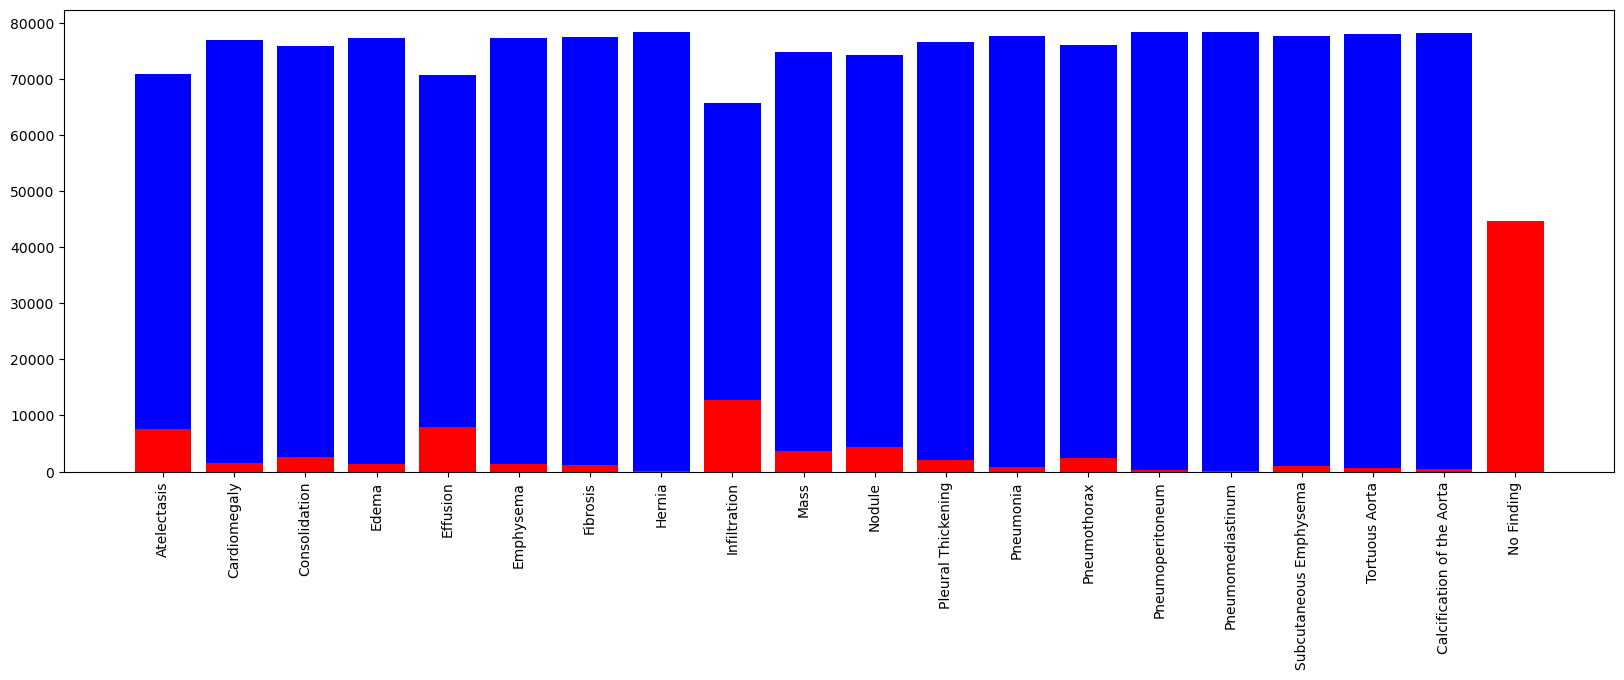

In [15]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.bar(x=labels, height=(y==0).sum(),color='blue')
plt.bar(x=labels, height=(y==1).sum(),color='red')
plt.show()

In [16]:
N = len(y["Atelectasis"])
    
positive_frequencies = ((y["Atelectasis"]==1).sum())/N
negative_frequencies = 1 - positive_frequencies

print(positive_frequencies)
print(negative_frequencies)

0.0966422948564441
0.903357705143556


In [17]:
for column in y.columns:
    value_counts = y[column].value_counts()
    pourcentage = value_counts/len(y)*100
    
    print("compte :", value_counts, "pourcentage : ", pourcentage)

compte : Atelectasis
0    70919
1     7587
Name: count, dtype: int64 pourcentage :  Atelectasis
0    90.335771
1     9.664229
Name: count, dtype: float64
compte : Cardiomegaly
0    76916
1     1590
Name: count, dtype: int64 pourcentage :  Cardiomegaly
0    97.974677
1     2.025323
Name: count, dtype: float64
compte : Consolidation
0    75880
1     2626
Name: count, dtype: int64 pourcentage :  Consolidation
0    96.655033
1     3.344967
Name: count, dtype: float64
compte : Edema
0    77223
1     1283
Name: count, dtype: int64 pourcentage :  Edema
0    98.36573
1     1.63427
Name: count, dtype: float64
compte : Effusion
0    70587
1     7919
Name: count, dtype: int64 pourcentage :  Effusion
0    89.912873
1    10.087127
Name: count, dtype: float64
compte : Emphysema
0    77179
1     1327
Name: count, dtype: int64 pourcentage :  Emphysema
0    98.309683
1     1.690317
Name: count, dtype: float64
compte : Fibrosis
0    77368
1     1138
Name: count, dtype: int64 pourcentage :  Fibrosis
0   

# Compute Class Frequencies

In [18]:
from sklearn.utils.class_weight import compute_class_weight

labels1 = df[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding']]  

labels_array = labels1.values  

# Calculez les poids de classe
class_weights = compute_class_weight('balanced', classes=np.unique(labels_array), y=labels_array.flatten())

# Créez un dictionnaire de poids de classe
class_weight_dict = dict(zip(np.unique(labels_array), class_weights))

# Affichez le dictionnaire de poids de classe
print("Poids de classe :")
print(class_weight_dict)

Poids de classe :
{0: 0.5327327372159004, 1: 8.137613632829911}


# Split

In [19]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Vérification images

In [20]:
image = r"C:\Users\nico_\Desktop\thorax_xray\images\00006585_007.png"

In [21]:
import cv2 as cv

In [22]:
img = cv.imread(image)

In [23]:
img.shape

(1024, 1024, 3)

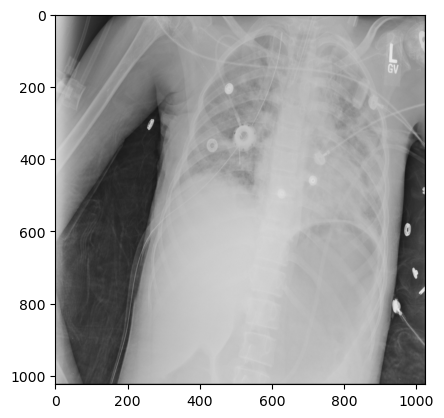

In [24]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

# Redimensionnement des images 1024x1024 en 150x150

Création d'un nouveau répertoire "images_resized" avec les images redimensonnées

In [25]:
# Chemin vers le répertoire contenant les images
input_dir = r"C:\Users\nico_\Desktop\thorax_xray\images"
output_dir = r"C:\Users\nico_\Desktop\thorax_xray\images_resized"

# Créer le répertoire de sortie s'il n'existe pas
os.makedirs(output_dir, exist_ok=True)

# Parcourir toutes les images dans le répertoire d'entrée
for filename in os.listdir(input_dir):
    if filename.endswith(".png"):  # ou tout autre format d'image que vous avez
        # Chemin d'entrée et de sortie pour chaque image
        input_path = os.path.join(input_dir, filename)
        
        # Ouvrir l'image
        img = Image.open(input_path)

        # Redimensionner l'image à 150x150
        img_resized = img.resize((150, 150))

        # Chemin de sortie pour chaque image redimensionnée
        output_path = os.path.join(output_dir, filename)

        # Enregistrer l'image redimensionnée dans le répertoire de sortie
        img_resized.save(output_path)

print("Conversion terminée.")


Conversion terminée.


# Redimensionnement des images 1024x1024 en 320x320

In [49]:
# Chemin vers le répertoire contenant les images
input_dir = r"C:\Users\nico_\Desktop\thorax_xray\images"
output_dir = r"C:\Users\nico_\Desktop\thorax_xray\images_resized320"

# Créer le répertoire de sortie s'il n'existe pas
os.makedirs(output_dir, exist_ok=True)

# Parcourir toutes les images dans le répertoire d'entrée
for filename in os.listdir(input_dir):
    if filename.endswith(".png"):  # ou tout autre format d'image que vous avez
        # Chemin d'entrée et de sortie pour chaque image
        input_path = os.path.join(input_dir, filename)
        
        # Ouvrir l'image
        img = Image.open(input_path)

        # Redimensionner l'image à 150x150
        img_resized320 = img.resize((150, 150))

        # Chemin de sortie pour chaque image redimensionnée
        output_path = os.path.join(output_dir, filename)

        # Enregistrer l'image redimensionnée dans le répertoire de sortie
        img_resized320.save(output_path)

print("Conversion terminée.")

Conversion terminée.


# ImageDataGenerator

In [28]:
#train_datagen = ImageDataGenerator( rescale = 1.0/255. )
#test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [50]:
image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True)

In [51]:
image_dir = r"C:\Users\nico_\Desktop\thorax_xray\images_resized320"

In [27]:
#image_dir = r"C:\Users\nico_\Desktop\thorax_xray\images_resized"

In [29]:
#image_dir = r"C:\Users\nico_\Desktop\thorax_xray\images"

In [52]:
import os

# Liste de tous les fichiers dans le répertoire d'images
all_files = os.listdir(image_dir)

# Liste des fichiers dans le dataframe
df_files = df['id'].tolist()

# Vérification des fichiers manquants
missing_files = []
for file in df_files:
    if file not in all_files:
        missing_files.append(file)

# Suppression des lignes correspondantes dans le dataframe
df = df[~df['id'].isin(missing_files)]

In [53]:
df.isnull().sum()

id                            0
Atelectasis                   0
Cardiomegaly                  0
Consolidation                 0
Edema                         0
Effusion                      0
Emphysema                     0
Fibrosis                      0
Hernia                        0
Infiltration                  0
Mass                          0
Nodule                        0
Pleural Thickening            0
Pneumonia                     0
Pneumothorax                  0
Pneumoperitoneum              0
Pneumomediastinum             0
Subcutaneous Emphysema        0
Tortuous Aorta                0
Calcification of the Aorta    0
No Finding                    0
dtype: int64

In [54]:
train_df.head()

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Nodule,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding
57770,00019060_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63874,00021186_000.png,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16935,00005722_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63166,00020947_008.png,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
35405,00011573_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding']

In [56]:
#train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,directory=image_dir, x_col= "id",
#                                                   y_col=labels, class_mode='raw', batch_size=20,
#                                                   target_size = (150, 150), shuffle=True, seed=42)

In [57]:
train_generator = image_generator.flow_from_dataframe(dataframe=train_df,directory=image_dir, x_col= "id",
                                                   y_col=labels, class_mode='raw', batch_size=20,
                                                   target_size = (150, 150), shuffle=True, seed=42)

Found 6397 validated image filenames.


C:\Users\nico_\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 56407 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


# Calcul des poids pour équilibrer les classes

wcross−entropy(x) = −(wp ylog(f(x)) + wn(1−y) log(1−f(x)))

In [58]:
def compute_class_freqs(labels):
    
    N = len(labels)
    
    positive_frequencies = sum(labels)/N
    negative_frequencies = 1 - positive_frequencies

    return positive_frequencies, negative_frequencies 

In [59]:
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)

In [60]:
freq_pos

array([0.10129748, 0.01469439, 0.02704393, 0.01016101, 0.09082382,
       0.020791  , 0.01328748, 0.00250117, 0.11974363, 0.03939347,
       0.05486947, 0.02235423, 0.00906675, 0.03063936, 0.00281382,
       0.00156323, 0.01625762, 0.00656558, 0.00328279, 0.61528842])

In [61]:
freq_neg

array([0.89870252, 0.98530561, 0.97295607, 0.98983899, 0.90917618,
       0.979209  , 0.98671252, 0.99749883, 0.88025637, 0.96060653,
       0.94513053, 0.97764577, 0.99093325, 0.96936064, 0.99718618,
       0.99843677, 0.98374238, 0.99343442, 0.99671721, 0.38471158])

In [62]:
pos_weights = freq_neg
neg_weights = freq_pos

In [63]:
pos_contribution = freq_pos * pos_weights 
neg_contribution = freq_neg * neg_weights

In [64]:
pos_contribution 

array([0.0910363 , 0.01447846, 0.02631255, 0.01005777, 0.08257486,
       0.02035873, 0.01311092, 0.00249492, 0.10540509, 0.03784162,
       0.05185881, 0.02185452, 0.00898454, 0.02970059, 0.0028059 ,
       0.00156079, 0.01599331, 0.00652247, 0.00327201, 0.23670858])

In [65]:
 neg_contribution 

array([0.0910363 , 0.01447846, 0.02631255, 0.01005777, 0.08257486,
       0.02035873, 0.01311092, 0.00249492, 0.10540509, 0.03784162,
       0.05185881, 0.02185452, 0.00898454, 0.02970059, 0.0028059 ,
       0.00156079, 0.01599331, 0.00652247, 0.00327201, 0.23670858])

In [66]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    
    def weighted_loss(y_true, y_pred):
        # initialize loss 
        loss = 0.0

        for i in range(len(pos_weights)):
            # convertion des types de données 
            pos_weight = K.cast(pos_weights[i], dtype=K.floatx())
            neg_weight = K.cast(neg_weights[i], dtype=K.floatx())
            
            # convertion y_true en float32
            y_true_float = K.cast(y_true, dtype=K.floatx())
            
            # calcul de la perte pondérée pour chaque classe
            loss_pos = -1 * K.mean(pos_weight * y_true_float[:, i] * K.log(y_pred[:, i] + epsilon))
            loss_neg = -1 * K.mean(neg_weight * (1 - y_true_float[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
            
            loss += loss_pos + loss_neg

        return loss
    
    return weighted_loss


In [67]:
#validation_generator = test_datagen.flow_from_dataframe(dataframe=test_df, directory=image_dir, x_col="id",
#                                                       y_col=labels, class_mode='raw', batch_size=20,
#                                                       target_size=(150,150), shuffle=False, seed=42)

In [68]:
validation_generator = image_generator.flow_from_dataframe(dataframe=test_df, directory=image_dir, x_col="id",
                                                       y_col=labels, class_mode='raw', batch_size=20,
                                                       target_size=(150,150), shuffle=False, seed=42)

Found 1572 validated image filenames.


C:\Users\nico_\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 14130 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


# Model DenseNet

In [78]:
model = DenseNet121(weights='imagenet', include_top=False)

In [79]:
x = model.output

# Ajout d'une nouvelle couche fully-connected pour la classification binaire pour chaque classe
x = GlobalAveragePooling2D()(x)
prediction = Dense(len(labels), activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=prediction)

#model.compile(optimizer='adam', loss='binary_crossentropy' ,metrics=["accuracy"])
model.compile(optimizer='adam', loss=get_weighted_loss(pos_weights, neg_weights), metrics = ['accuracy'])

# Compilez le modèle en utilisant les poids de classe équilibrés
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'], class_weight=class_weights)

# Calcul des steps : steps = nombre d'images / batch_size

In [80]:
train_steps = 6397 // 20  
val_steps = 1572 // 20

In [81]:
history = model.fit(train_generator, 
                              validation_data=validation_generator,
                              steps_per_epoch=train_steps, 
                              validation_steps=val_steps, 
                              epochs = 50)

Epoch 1/50
319/319 [==============================] - 1675s 5s/step - loss: 1.0954 - accuracy: 0.1422 - val_loss: 4.2853 - val_accuracy: 0.0218
Epoch 2/50
319/319 [==============================] - 1606s 5s/step - loss: 1.0368 - accuracy: 0.1763 - val_loss: 12.4762 - val_accuracy: 0.0981
Epoch 3/50
319/319 [==============================] - 1598s 5s/step - loss: 1.0242 - accuracy: 0.2045 - val_loss: 11.2065 - val_accuracy: 0.0083
Epoch 4/50
319/319 [==============================] - 1596s 5s/step - loss: 1.0203 - accuracy: 0.2261 - val_loss: 1.7594 - val_accuracy: 0.1487
Epoch 5/50
319/319 [==============================] - 1594s 5s/step - loss: 0.9845 - accuracy: 0.2244 - val_loss: 1.0553 - val_accuracy: 0.0821
Epoch 6/50
319/319 [==============================] - 1632s 5s/step - loss: 0.9706 - accuracy: 0.2227 - val_loss: 0.9792 - val_accuracy: 0.2468
Epoch 7/50
319/319 [==============================] - 1605s 5s/step - loss: 0.9490 - accuracy: 0.2137 - val_loss: 11.9765 - val_accura

Text(0.5, 1.0, 'Training and validation loss')

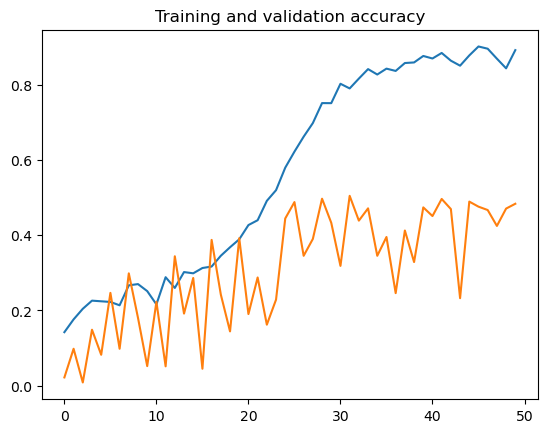

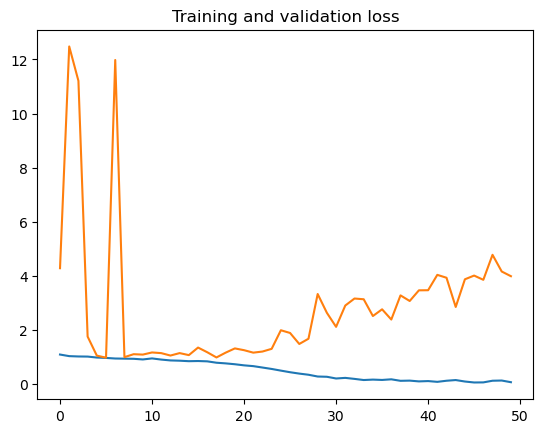

In [82]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) 

# training accuracy : blue
# validation accuracy :orange

plt.plot  ( epochs, acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()


plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')

# Predict

In [ ]:
predicted_vals = model.predict(validation_generator, steps = len(validation_generator))

# ROC curve

79/79 [==============================] - 108s 1s/step


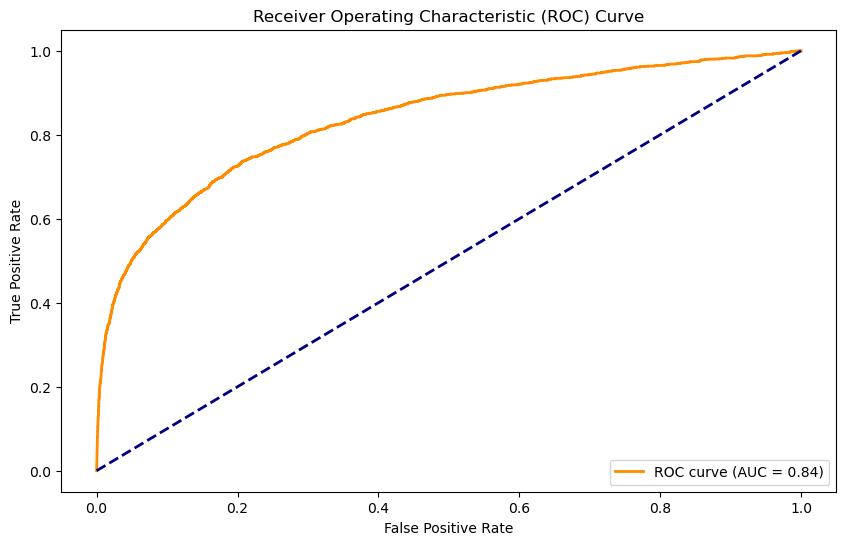

In [95]:
from sklearn.metrics import roc_curve, auc

# Obtenez les prédictions du modèle sur l'ensemble de validation
y_pred = model.predict(validation_generator)

# Calculer de la courbe ROC
fpr, tpr, thresholds = roc_curve(validation_generator.labels.ravel(), y_pred.ravel())

# Calcul de l'AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Image test

In [83]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [84]:
test_directory = 'C:\\Users\\nico_\\Desktop\\thorax_xray\\cardiomegalie.jpg'

img = load_img(test_directory, target_size=(150, 150))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

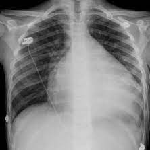

In [85]:
img

In [86]:
x.shape

(1, 150, 150, 3)

In [87]:
img_resized = img.resize((150, 150))

In [88]:
x = img_to_array(img_resized)
x /= 255
x = np.expand_dims(x, axis=0)

In [89]:
classes = model.predict(x)

threshold = 0.5

binary_predictions = (classes > threshold).astype(int)

1/1 [==============================] - 6s 6s/step


In [90]:
binary_predictions

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]])

In [91]:
classes

array([[1.0324693e-05, 5.4584659e-04, 9.7232759e-01, 1.7182454e-01,
        2.2038082e-03, 5.9254355e-05, 2.6275451e-05, 1.3542175e-09,
        2.1357533e-02, 4.2167758e-05, 6.9989222e-03, 2.8456905e-06,
        5.9896392e-01, 1.7458378e-04, 7.3993212e-01, 7.4493596e-03,
        9.1043337e-05, 8.4443178e-07, 2.3334479e-08, 5.3439695e-02]],
      dtype=float32)